# Starter

In [56]:
%matplotlib inline

In [57]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
%autoreload

In [65]:
import ray
import numpy as np
from ray import tune

In [66]:
search_space = {
    "lr": tune.sample_from(lambda spec: 10**(-10 * np.random.rand())),
    "momentum": tune.uniform(0.1, 0.9)
}

In [67]:
ray.shutdown()

In [68]:
ray.init(address='auto')

2020-04-01 13:29:08,783	WARNING worker.py:792 -- When connecting to an existing cluster, _internal_config must match the cluster's _internal_config.


{'node_ip_address': '172.31.24.88',
 'redis_address': '172.31.24.88:6379',
 'object_store_address': '/tmp/ray/session_2020-04-01_13-07-58_589506_5758/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-04-01_13-07-58_589506_5758/sockets/raylet',
 'webui_url': 'localhost:8265',
 'session_dir': '/tmp/ray/session_2020-04-01_13-07-58_589506_5758'}

In [69]:
from tune_mnist import train_mnist

Trial name,status,loc,lr,momentum
train_mnist_00000,RUNNING,,0.0188471,0.843409


Result for train_mnist_00000:
  date: 2020-04-01_13-29-10
  done: false
  experiment_id: dc4760e4ad904492a56bb9d1beb4d98a
  experiment_tag: 0_lr=0.018847,momentum=0.84341
  hostname: ip-172-31-24-88
  iterations_since_restore: 1
  mean_accuracy: 0.528125
  node_ip: 172.31.24.88
  pid: 14138
  time_since_restore: 0.25346922874450684
  time_this_iter_s: 0.25346922874450684
  time_total_s: 0.25346922874450684
  timestamp: 1585747750
  timesteps_since_restore: 0
  training_iteration: 0
  trial_id: '00000'
  


Trial name,status,loc,lr,momentum,acc,iter,total time (s)
train_mnist_00000,TERMINATED,,0.0188471,0.843409,0.85625,9,2.14208


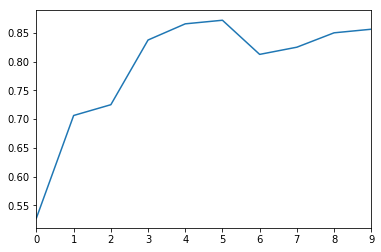

In [70]:
analysis = tune.run(train_mnist, config=search_space)

dfs = analysis.trial_dataframes
[d.mean_accuracy.plot() for d in dfs.values()]